<a href="https://colab.research.google.com/github/amirsartipi13/DM-P2-Classifications/blob/master/DM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as  np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import missingno as mg
import seaborn as sns
plt.style.use('seaborn-whitegrid')


# Show data

In [122]:
# df = pd.read_excel('/content/drive/MyDrive/data_sets/DM-Classification/final.xlsx')
df = pd.read_excel('/content/drive/MyDrive/data_sets/DM-Classification/dataset.xls')

df.head()

,Unnamed: 0,Customer,Agent,SalesAgentEmailID,ContactEmailID,Stage,Product,Close_Value,Created Date,Close Date
0,0,Konex,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255.0,2016-01-04,2016-05-24
1,1,Finjob,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45.0,2016-01-04,2016-11-02
2,2,Kinnamplus,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,NaN,2016-01-06,2016-12-07
3,3,Genco Pura Olive Oil Company,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054.0,2016-01-06,2016-09-11
4,4,Stanredtax,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180.0,2016-01-07,2016-01-31


In [ ]:
df.tail()

,Unnamed: 0,Customer,Agent,SalesAgentEmailID,ContactEmailID,Stage,Product,Close_Value,Created Date,Close Date
7795,7795,Vehement Capital Partners,Jonathan Berthelot,jonathan@piedpiper.com,lavonia@vehementcapitalpartners.com,In Progress,GTX Basic,590.0,2018-12-30,2019-07-22
7796,7796,Hottechi,Marty Freudenburg,marty@piedpiper.com,juliette@hottechi.com,In Progress,MG Advanced,3284.0,2018-12-30,2019-05-26
7797,7797,Umbrella Corporation,Anna Snelling,anna@piedpiper.com,orpha@umbrellacorporation.com,In Progress,GTX Plus Pro,300.0,2018-12-31,2019-04-15
7798,7798,Rundofase,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,3284.0,2018-12-31,2019-05-16
7799,7799,Y-corporation,Jonathan Berthelot,jonathan@piedpiper.com,rosanne@y-corporation.com,In Progress,MG Special,1014.0,2018-12-31,2019-08-01


In [ ]:
df.shape,  df.dtypes, df.columns

((7800, 10), Unnamed: 0                    int64
 Customer                     object
 Agent                        object
 SalesAgentEmailID            object
 ContactEmailID               object
 Stage                        object
 Product                      object
 Close_Value                 float64
 Created Date         datetime64[ns]
 Close Date           datetime64[ns]
 dtype: object, Index(['Unnamed: 0', 'Customer', 'Agent', 'SalesAgentEmailID',
        'ContactEmailID', 'Stage', 'Product', 'Close_Value', 'Created Date',
        'Close Date'],
       dtype='object'))

In [ ]:
df.describe(), df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         7800 non-null   int64         
 1   Customer           7800 non-null   object        
 2   Agent              7800 non-null   object        
 3   SalesAgentEmailID  7800 non-null   object        
 4   ContactEmailID     7800 non-null   object        
 5   Stage              7800 non-null   object        
 6   Product            7800 non-null   object        
 7   Close_Value        6592 non-null   float64       
 8   Created Date       7800 non-null   datetime64[ns]
 9   Close Date         7800 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 609.5+ KB


(        Unnamed: 0   Close_Value
 count  7800.000000   6592.000000
 mean   3899.500000   1852.915504
 std    2251.810383   2197.116613
 min       0.000000     41.000000
 25%    1949.750000    492.000000
 50%    3899.500000   1000.000000
 75%    5849.250000   3393.000000
 max    7799.000000  30288.000000, None)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Customer', 'Agent', 'SalesAgentEmailID',
       'ContactEmailID', 'Stage', 'Product', 'Close_Value', 'Created Date',
       'Close Date'],
      dtype='object')

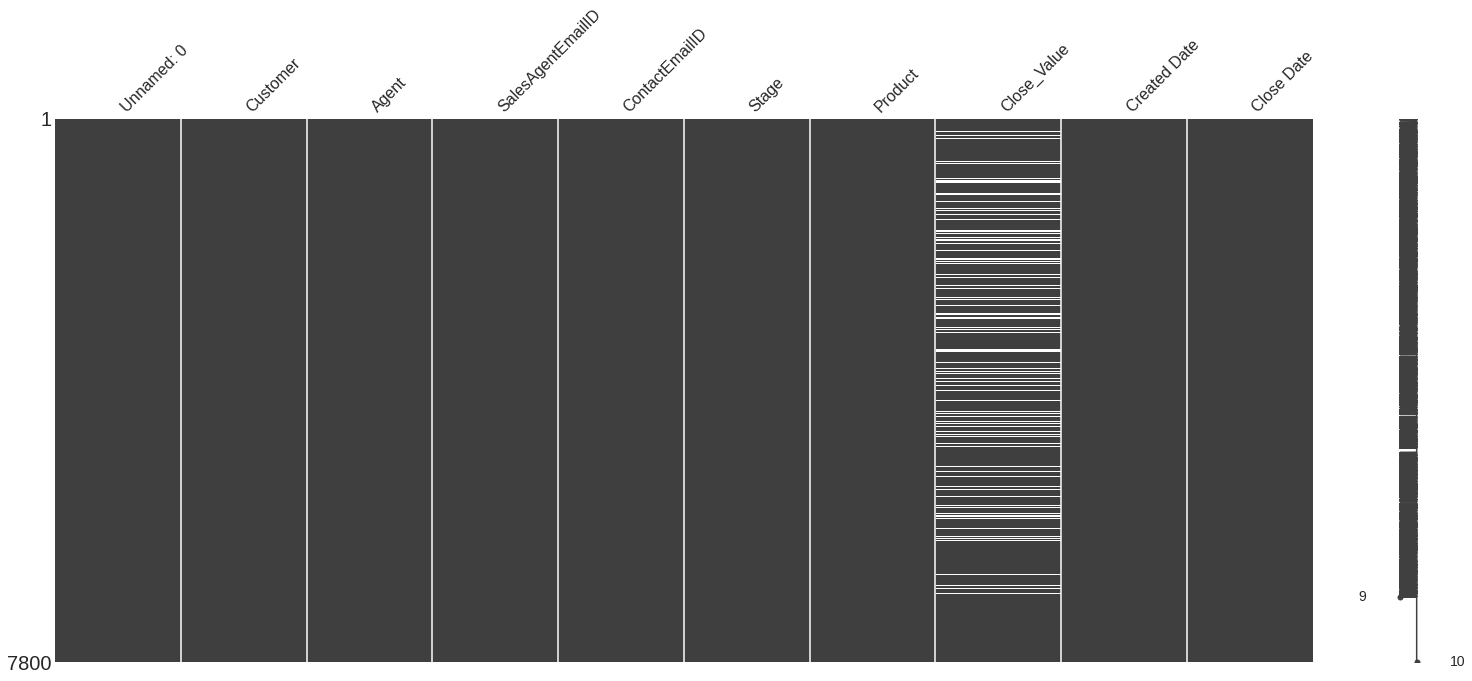

In [ ]:
mg.matrix(df)

In [ ]:
df_feature = pd.DataFrame()

# Label understanding

Won            3738
In Progress    2089
Lost           1973
Name: Stage, dtype: int64


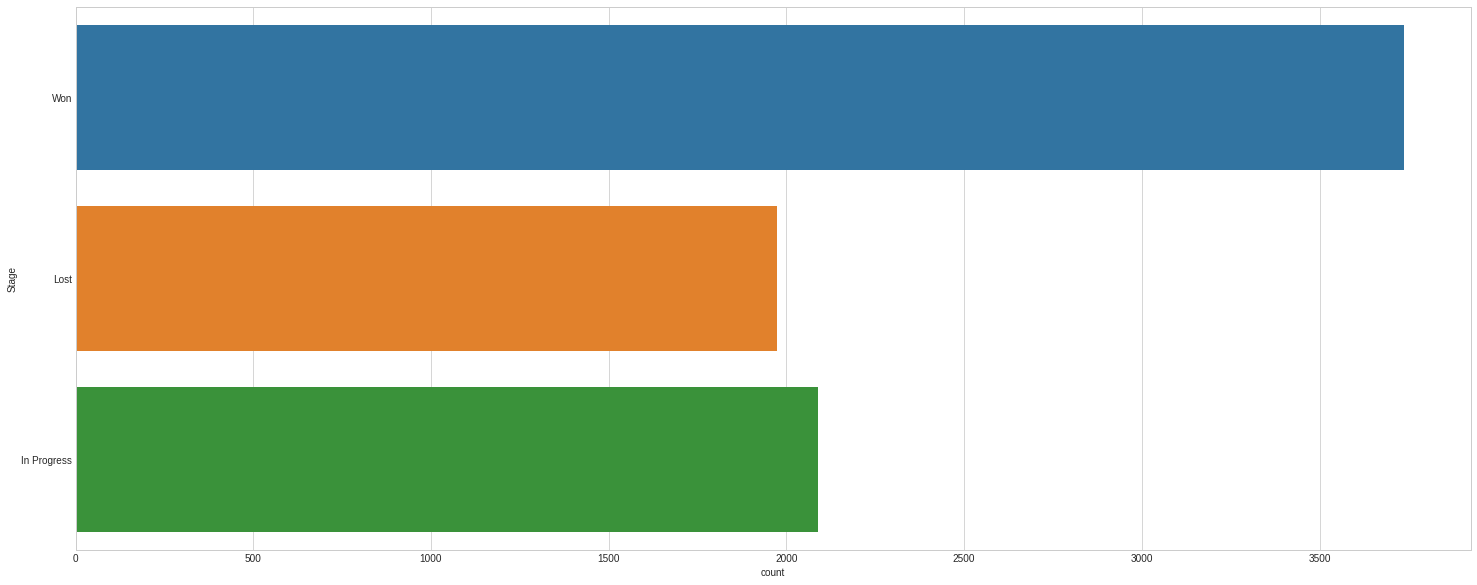

In [ ]:
print(df['Stage'].value_counts())
fig = plt.figure(figsize=(25, 10))
sns.countplot(y='Stage', data=df)

# Feature Engineering

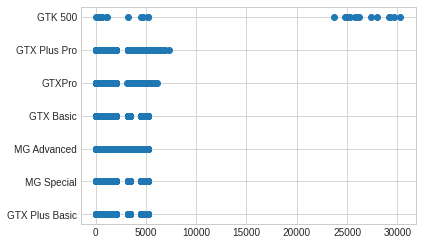

In [124]:
plt.scatter(y=df['Product'], x=df['Close_Value'])

**Customer**

In [ ]:
df['Customer'].value_counts()


Hottechi                 188
Kan-code                 184
Condax                   163
Konex                    160
Dontechi                 135
                        ... 
Iselectrics               63
The New York Inquirer     62
Plusstrip                 62
Bioplex                   61
Sumace                    56
Name: Customer, Length: 85, dtype: int64

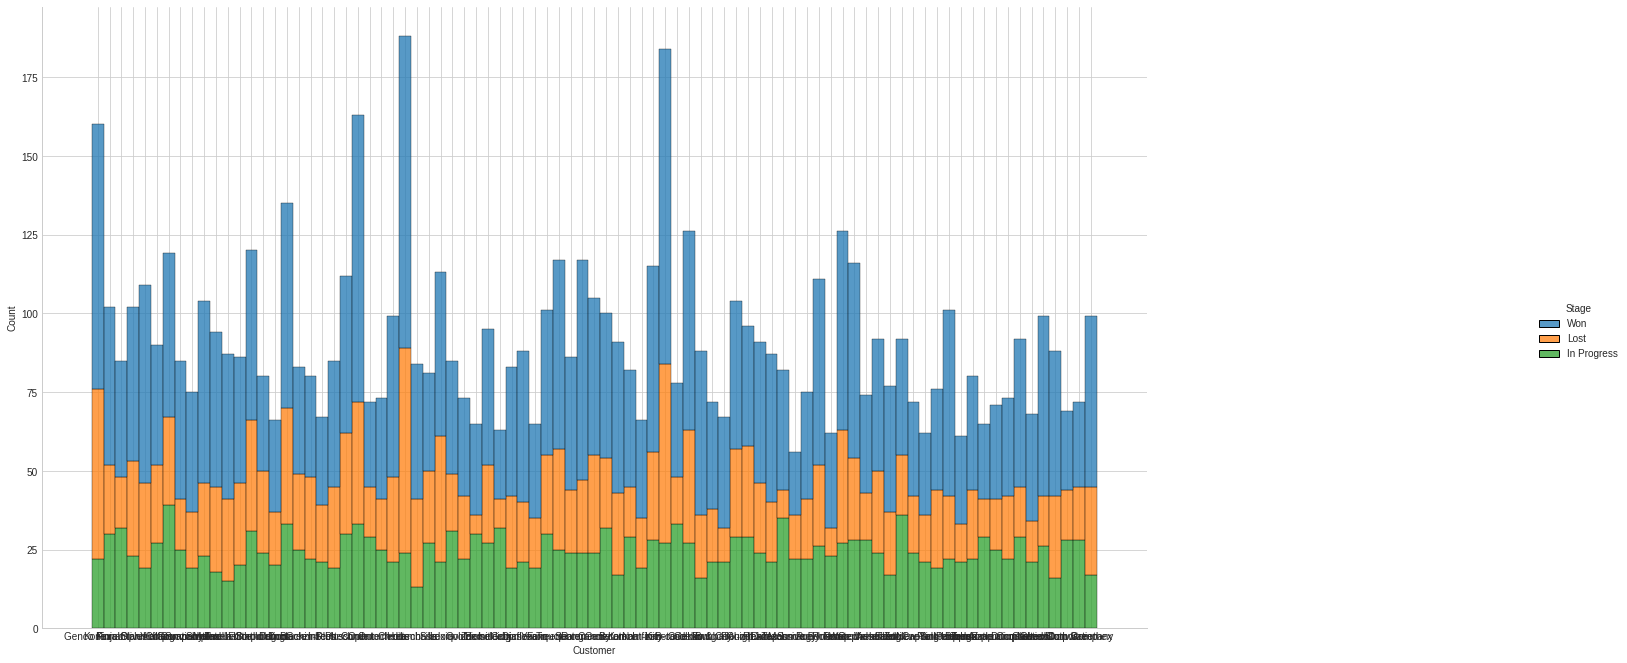

In [ ]:
g =sns.displot(data=df, x="Customer", hue="Stage", multiple="stack")
g.fig.set_figwidth(25)
g.fig.set_figheight(10)


**Agent**

In [ ]:
df['Agent'].value_counts()

Darcel Schlecht       666
Vicki Laflamme        406
Anna Snelling         397
Kary Hendrixson       388
Versie Hillebrand     331
Kami Bicknell         317
Jonathan Berthelot    313
Zane Levy             313
Cassey Cress          311
Gladys Colclough      288
Lajuana Vencill       275
Corliss Cosme         273
Markita Hansen        270
Maureen Marcano       255
Marty Freudenburg     251
Donn Cantrell         234
James Ascencio        233
Violet Mclelland      232
Daniell Hammack       227
Moses Frase           222
Niesha Huffines       214
Reed Clapper          202
Boris Faz             185
Cecily Lampkin        181
Hayden Neloms         174
Elease Gluck          153
Rosalina Dieter       149
Rosie Papadopoulos    142
Wilburn Farren        100
Garret Kinder          98
Name: Agent, dtype: int64

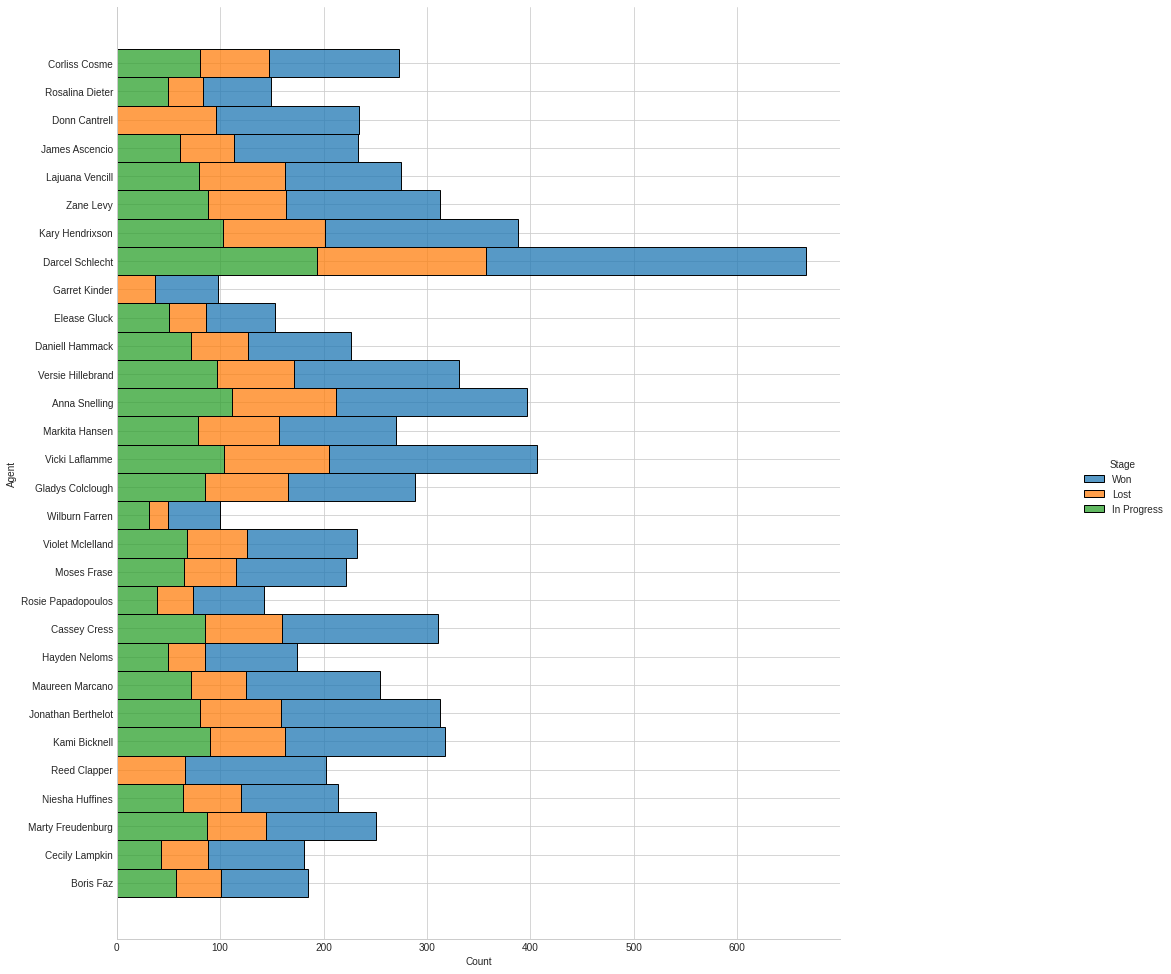

In [ ]:
g =sns.displot(data=df, y="Agent", hue="Stage", multiple="stack")
g.fig.set_figwidth(20)
g.fig.set_figheight(15)

In [ ]:
df[df['Stage']== 'Won'].plot()

In [ ]:
df.groupby(by='Agent')['Stage'].value_counts()

Agent           Stage      
Anna Snelling   Won            185
                In Progress    112
                Lost           100
Boris Faz       Won             84
                In Progress     57
                              ... 
Wilburn Farren  In Progress     31
                Lost            19
Zane Levy       Won            149
                In Progress     88
                Lost            76
Name: Stage, Length: 87, dtype: int64

**Sales agent email id**


In [ ]:
df['SalesAgentEmailID'].value_counts(), df['Agent'].value_counts(), len(df['SalesAgentEmailID'].value_counts()) == len(df['Agent'].value_counts())

(darcel@piedpiper.com      666
 vicki@piedpiper.com       406
 anna@piedpiper.com        397
 kary@piedpiper.com        388
 versie@piedpiper.com      331
 kami@piedpiper.com        317
 zane@piedpiper.com        313
 jonathan@piedpiper.com    313
 cassey@piedpiper.com      311
 gladys@piedpiper.com      288
 lajuana@piedpiper.com     275
 corliss@piedpiper.com     273
 markita@piedpiper.com     270
 maureen@piedpiper.com     255
 marty@piedpiper.com       251
 donn@piedpiper.com        234
 james@piedpiper.com       233
 violet@piedpiper.com      232
 daniell@piedpiper.com     227
 moses@piedpiper.com       222
 niesha@piedpiper.com      214
 reed@piedpiper.com        202
 boris@piedpiper.com       185
 cecily@piedpiper.com      181
 hayden@piedpiper.com      174
 elease@piedpiper.com      153
 rosalina@piedpiper.com    149
 rosie@piedpiper.com       142
 wilburn@piedpiper.com     100
 garret@piedpiper.com       98
 Name: SalesAgentEmailID, dtype: int64, Darcel Schlecht       666
 Vic

this column can be droped because is same as agent

**Contact email id**

In [ ]:
df['ContactEmailID'].value_counts()

juliette@hottechi.com         188
kenton@kan-code.com           184
golda@condax.com              163
delila@konex.com              160
kristle@dontechi.com          135
                             ... 
mirta@iselectrics.com          63
deanne@plusstrip.com           62
hai@thenewyorkinquirer.com     62
cassy@bioplex.com              61
ursula@sumace.com              56
Name: ContactEmailID, Length: 85, dtype: int64

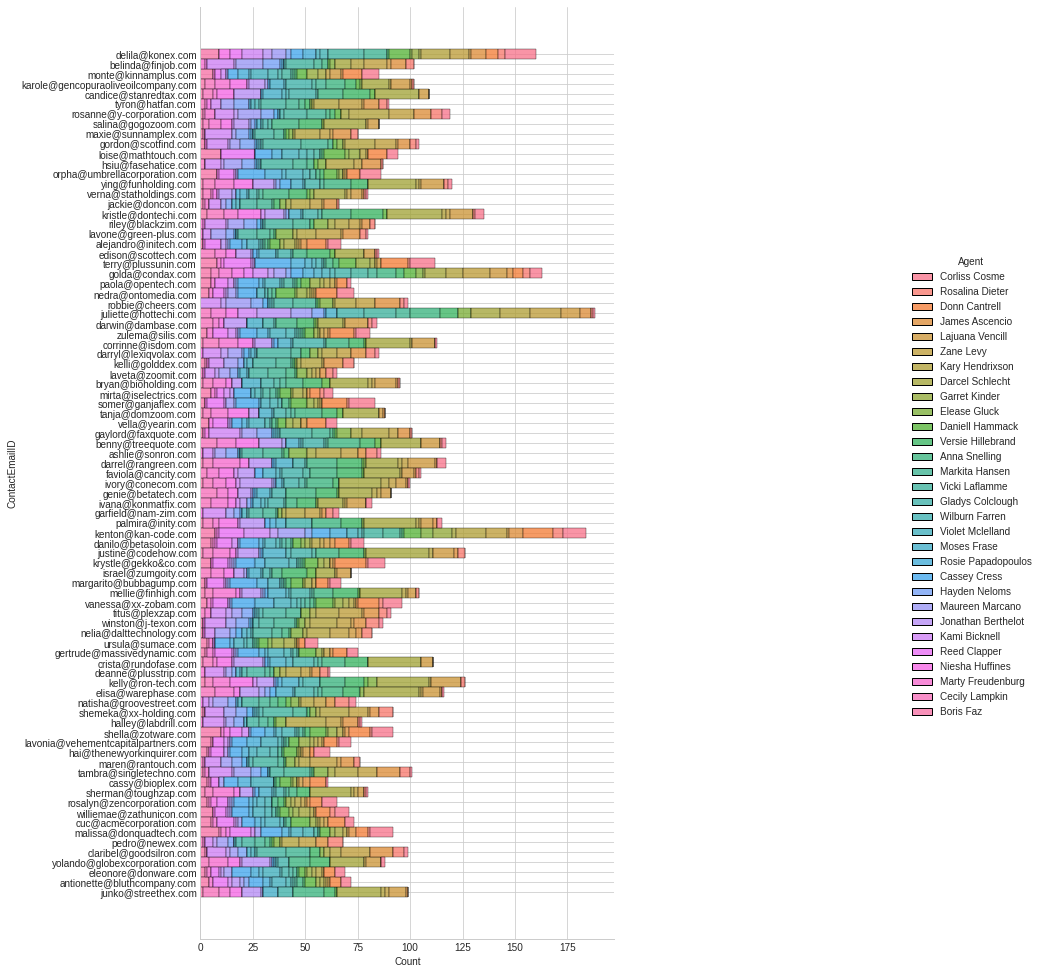

In [ ]:
g =sns.displot(data=df, y="ContactEmailID", hue="Agent", multiple="stack")
g.fig.set_figwidth(20)
g.fig.set_figheight(15)

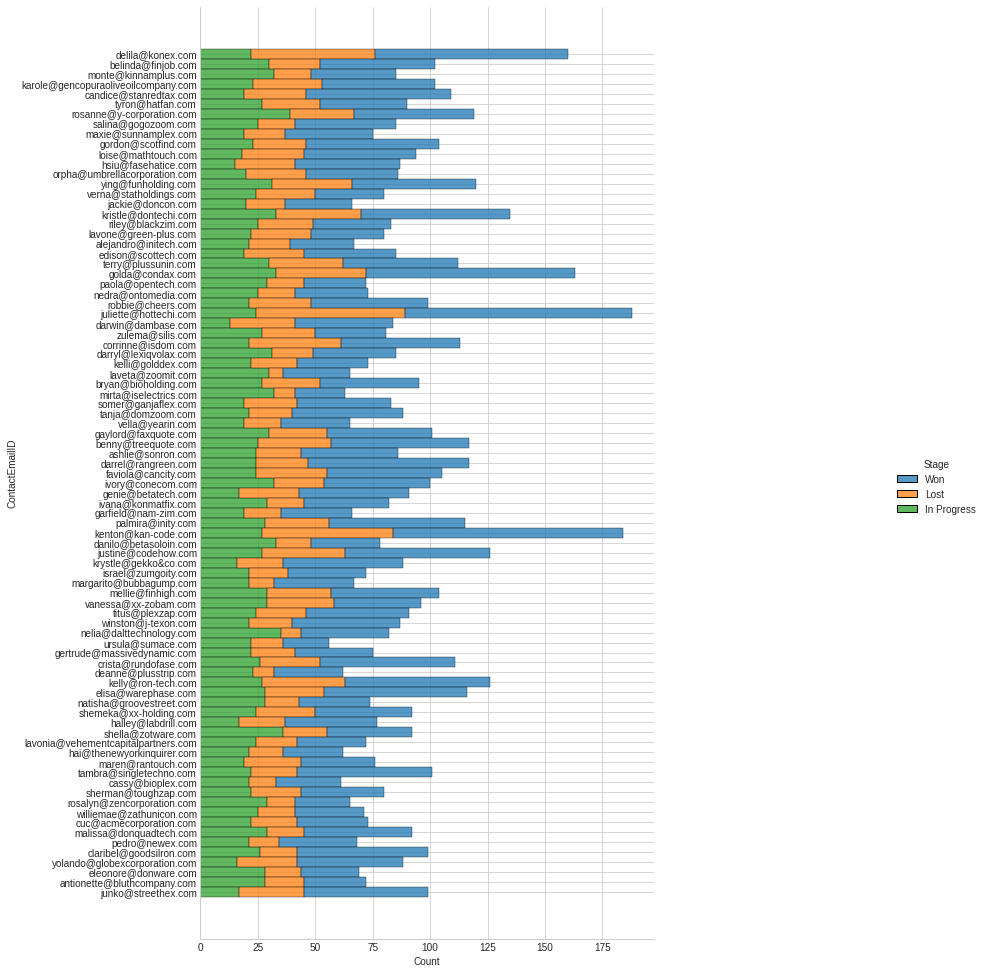

In [ ]:
g =sns.displot(data=df, y="ContactEmailID", hue="Stage", multiple="stack")
g.fig.set_figwidth(20)
g.fig.set_figheight(15)

In [ ]:
pd.crosstab(df['ContactEmailID'], df['Agent'])

Agent,Anna Snelling,Boris Faz,Cassey Cress,Cecily Lampkin,Corliss Cosme,Daniell Hammack,Darcel Schlecht,Donn Cantrell,Elease Gluck,Garret Kinder,Gladys Colclough,Hayden Neloms,James Ascencio,Jonathan Berthelot,Kami Bicknell,Kary Hendrixson,Lajuana Vencill,Markita Hansen,Marty Freudenburg,Maureen Marcano,Moses Frase,Niesha Huffines,Reed Clapper,Rosalina Dieter,Rosie Papadopoulos,Versie Hillebrand,Vicki Laflamme,Violet Mclelland,Wilburn Farren,Zane Levy
ContactEmailID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
alejandro@initech.com,1,1,6,0,6,5,5,9,0,2,1,1,3,2,0,1,1,1,0,1,0,1,8,1,2,1,0,6,1,1
antionette@bluthcompany.com,3,4,7,0,5,5,2,5,0,2,1,2,0,4,2,1,1,1,2,2,1,0,7,0,3,1,1,7,2,1
ashlie@sonron.com,1,0,0,0,2,0,4,0,9,0,1,6,4,1,5,12,0,9,1,5,0,0,0,5,1,2,10,0,0,8
belinda@finjob.com,3,0,1,0,0,1,8,0,2,0,1,8,7,1,13,6,2,4,2,13,0,1,0,4,1,0,13,0,0,11
benny@treequote.com,15,0,0,8,2,3,19,0,0,0,10,0,0,11,0,0,9,1,9,2,6,11,0,1,0,7,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
williemae@zathunicon.com,1,6,8,0,7,4,5,7,2,3,0,0,0,1,1,2,1,0,0,1,0,1,5,2,2,1,2,6,3,0
winston@j-texon.com,1,1,1,0,2,1,2,0,3,0,3,6,6,0,10,13,1,10,0,5,0,1,0,6,1,0,7,0,0,7
ying@funholding.com,13,1,5,6,2,0,23,0,0,0,7,2,0,10,0,1,11,2,9,1,6,9,0,2,0,8,0,1,0,1


In [ ]:
pd.crosstab(df['ContactEmailID'], df['Stage'])

Stage,In Progress,Lost,Won
ContactEmailID,,,
alejandro@initech.com,21,18,28
antionette@bluthcompany.com,28,17,27
ashlie@sonron.com,24,20,42
belinda@finjob.com,30,22,50
benny@treequote.com,25,32,60
...,...,...,...
williemae@zathunicon.com,25,16,30
winston@j-texon.com,21,19,47
ying@funholding.com,31,35,54


**Product**

In [ ]:
df['Product'].value_counts()

GTX Basic         1650
MG Special        1464
GTXPro            1309
MG Advanced       1252
GTX Plus Basic    1225
GTX Plus Pro       862
GTK 500             38
Name: Product, dtype: int64

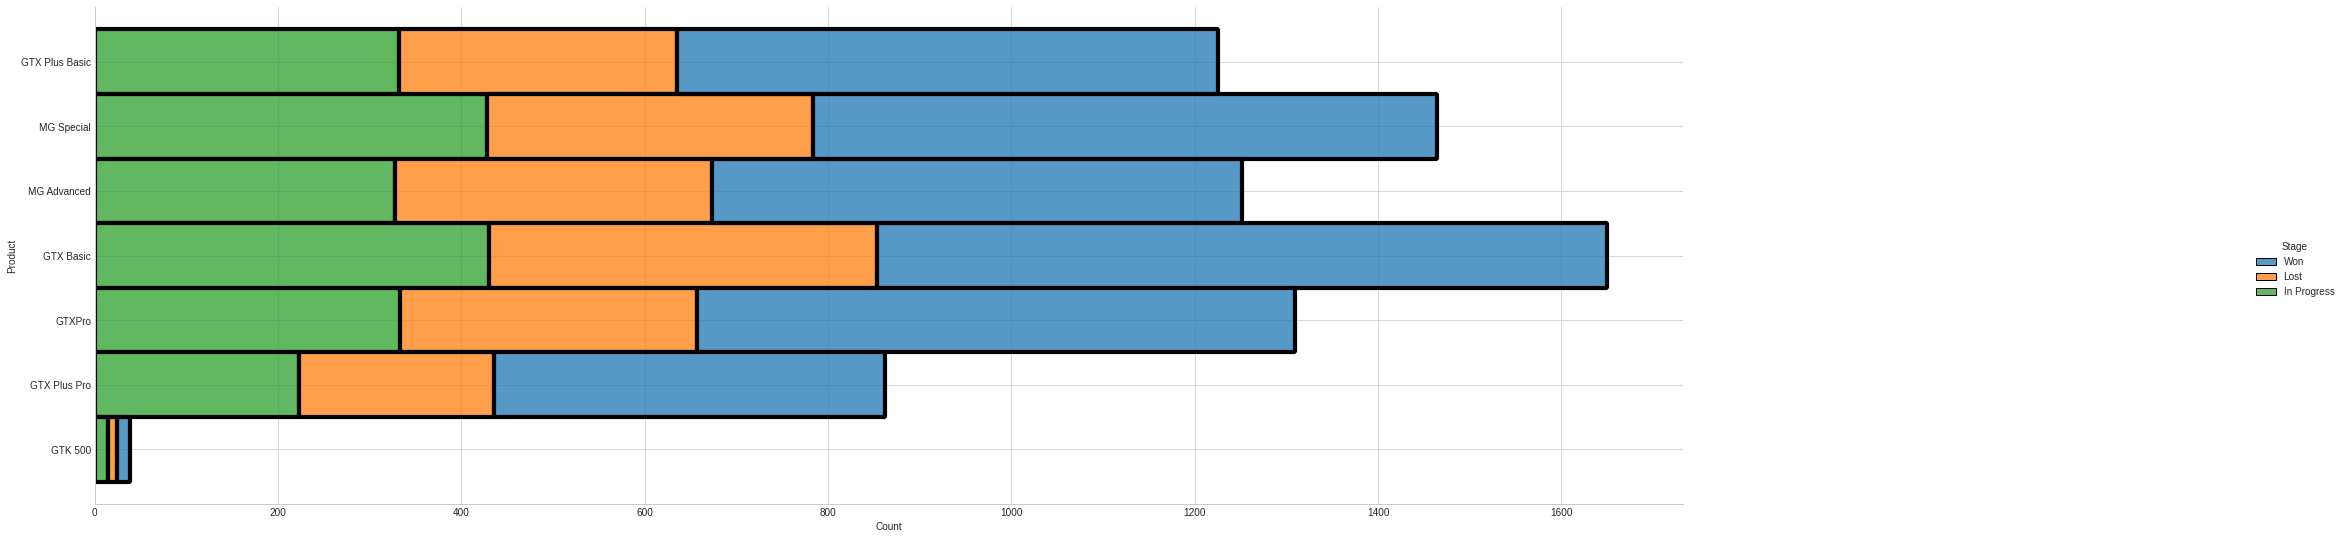

In [ ]:
g =sns.displot(data=df, y="Product", hue="Stage", multiple="stack")
g.fig.set_figwidth(40)
g.fig.set_figheight(8)

In [ ]:
' '.join(df.columns.to_list())

'Unnamed: 0 Customer Agent SalesAgentEmailID ContactEmailID Stage Product Close_Value Created Date Close Date'

In [ ]:
products = df['Product'].unique()
for product in products:
  a = df[(df['Product']== product) & (df['Stage']== 'Won')].count() /df[(df['Product']== product) & (df['Stage']== 'Lost')].count()
  b = df[(df['Product']== product) & (df['Stage']== 'In Progress')].count() /df[(df['Product']== product) & (df['Stage']== 'Lost')].count()
  c = df[(df['Product']== product) & (df['Stage']== 'In Progress')].count() /df[(df['Product']== product) & (df['Stage']== 'Won')].count()
  print(a, b, c)
  print("__________________")

Unnamed: 0           1.947195
Customer             1.947195
Agent                1.947195
SalesAgentEmailID    1.947195
ContactEmailID       1.947195
Stage                1.947195
Product              1.947195
Close_Value          1.950000
Created Date         1.947195
Close Date           1.947195
dtype: float64 Unnamed: 0           1.095710
Customer             1.095710
Agent                1.095710
SalesAgentEmailID    1.095710
ContactEmailID       1.095710
Stage                1.095710
Product              1.095710
Close_Value          1.073077
Created Date         1.095710
Close Date           1.095710
dtype: float64 Unnamed: 0           0.562712
Customer             0.562712
Agent                0.562712
SalesAgentEmailID    0.562712
ContactEmailID       0.562712
Stage                0.562712
Product              0.562712
Close_Value          0.550296
Created Date         0.562712
Close Date           0.562712
dtype: float64
__________________
Unnamed: 0           1.910112
Custom

**Close value**

In [ ]:
df['Close_Value'].value_counts()

50.0      279
57.0      136
53.0      132
49.0      120
61.0      115
         ... 
3813.0      1
2949.0      1
4855.0      1
4945.0      1
4844.0      1
Name: Close_Value, Length: 1694, dtype: int64

**Created Date**

In [ ]:
df['Created Date'].value_counts()

2017-12-30    30
2017-11-15    30
2017-08-30    30
2017-06-06    29
2017-10-25    29
              ..
2018-12-09     1
2018-01-24     1
2018-03-19     1
2016-06-28     1
2016-12-13     1
Name: Created Date, Length: 857, dtype: int64

# Model Training


In [164]:
df = pd.read_excel('/content/drive/MyDrive/data_sets/DM-Classification/final.xlsx')

In [ ]:
df[(df['Stage']=="Lost") & (df['Sentiment']>10)]

In [ ]:
g =sns.displot(data=df, y="Sentiment", hue="Stage", multiple="stack")
g.fig.set_figwidth(25)
g.fig.set_figheight(15)

In [ ]:
df.dtypes

**Missing data**


In [165]:
df = df[df['Close_Value']<15000]
df['Close_Value'] = df['Close_Value'].fillna(value=df['Close_Value'].mean())
df['Duration'] = (df['Close Date'] - df['Created Date']).dt.days
df = df.drop(columns=['Call', 'Email', 'Meeting', 'Posetive', 'Negative', 'Sentiment'])


In [166]:
df

,Unnamed: 0,Unnamed: 0.1,Customer,Agent,SalesAgentEmailID,ContactEmailID,Stage,Product,Close_Value,Created Date,Close Date,Duration
0,0,0,Konex,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255.0,2016-01-04,2016-05-24,141
1,1,1,Finjob,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45.0,2016-01-04,2016-11-02,303
3,3,3,Genco Pura Olive Oil Company,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054.0,2016-01-06,2016-09-11,249
4,4,4,Stanredtax,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180.0,2016-01-07,2016-01-31,24
5,5,5,Hatfan,Zane Levy,zane@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,517.0,2016-01-08,2016-12-08,335
...,...,...,...,...,...,...,...,...,...,...,...,...
7795,7795,7795,Vehement Capital Partners,Jonathan Berthelot,jonathan@piedpiper.com,lavonia@vehementcapitalpartners.com,In Progress,GTX Basic,590.0,2018-12-30,2019-07-22,204
7796,7796,7796,Hottechi,Marty Freudenburg,marty@piedpiper.com,juliette@hottechi.com,In Progress,MG Advanced,3284.0,2018-12-30,2019-05-26,147
7797,7797,7797,Umbrella Corporation,Anna Snelling,anna@piedpiper.com,orpha@umbrellacorporation.com,In Progress,GTX Plus Pro,300.0,2018-12-31,2019-04-15,105
7798,7798,7798,Rundofase,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,3284.0,2018-12-31,2019-05-16,136


**Stage preprocessing**

In [168]:
import random 
# df = df.drop(df.columns[:3], axis=1)
# df = df.drop(df.columns[5: 7], axis=1)

features_df = pd.get_dummies(df, columns=['SalesAgentEmailID', 'ContactEmailID', 'Product'],drop_first=True)
features_df = features_df[[c for c in features_df if c not in ['Close_Value','Stage']] + ['Close_Value', 'Stage']]
features_df

,Unnamed: 0,Unnamed: 0.1,Customer,Agent,Created Date,Close Date,Duration,SalesAgentEmailID_boris@piedpiper.com,SalesAgentEmailID_cassey@piedpiper.com,SalesAgentEmailID_cecily@piedpiper.com,SalesAgentEmailID_corliss@piedpiper.com,SalesAgentEmailID_daniell@piedpiper.com,SalesAgentEmailID_darcel@piedpiper.com,SalesAgentEmailID_donn@piedpiper.com,SalesAgentEmailID_elease@piedpiper.com,SalesAgentEmailID_garret@piedpiper.com,SalesAgentEmailID_gladys@piedpiper.com,SalesAgentEmailID_hayden@piedpiper.com,SalesAgentEmailID_james@piedpiper.com,SalesAgentEmailID_jonathan@piedpiper.com,SalesAgentEmailID_kami@piedpiper.com,SalesAgentEmailID_kary@piedpiper.com,SalesAgentEmailID_lajuana@piedpiper.com,SalesAgentEmailID_markita@piedpiper.com,SalesAgentEmailID_marty@piedpiper.com,SalesAgentEmailID_maureen@piedpiper.com,SalesAgentEmailID_moses@piedpiper.com,SalesAgentEmailID_niesha@piedpiper.com,SalesAgentEmailID_reed@piedpiper.com,SalesAgentEmailID_rosalina@piedpiper.com,SalesAgentEmailID_rosie@piedpiper.com,SalesAgentEmailID_versie@piedpiper.com,SalesAgentEmailID_vicki@piedpiper.com,SalesAgentEmailID_violet@piedpiper.com,SalesAgentEmailID_wilburn@piedpiper.com,SalesAgentEmailID_zane@piedpiper.com,ContactEmailID_antionette@bluthcompany.com,ContactEmailID_ashlie@sonron.com,ContactEmailID_belinda@finjob.com,ContactEmailID_benny@treequote.com,...,ContactEmailID_mirta@iselectrics.com,ContactEmailID_monte@kinnamplus.com,ContactEmailID_natisha@groovestreet.com,ContactEmailID_nedra@ontomedia.com,ContactEmailID_nelia@dalttechnology.com,ContactEmailID_orpha@umbrellacorporation.com,ContactEmailID_palmira@inity.com,ContactEmailID_paola@opentech.com,ContactEmailID_pedro@newex.com,ContactEmailID_riley@blackzim.com,ContactEmailID_robbie@cheers.com,ContactEmailID_rosalyn@zencorporation.com,ContactEmailID_rosanne@y-corporation.com,ContactEmailID_salina@gogozoom.com,ContactEmailID_shella@zotware.com,ContactEmailID_shemeka@xx-holding.com,ContactEmailID_sherman@toughzap.com,ContactEmailID_somer@ganjaflex.com,ContactEmailID_tambra@singletechno.com,ContactEmailID_tanja@domzoom.com,ContactEmailID_terry@plussunin.com,ContactEmailID_titus@plexzap.com,ContactEmailID_tyron@hatfan.com,ContactEmailID_ursula@sumace.com,ContactEmailID_vanessa@xx-zobam.com,ContactEmailID_vella@yearin.com,ContactEmailID_verna@statholdings.com,ContactEmailID_williemae@zathunicon.com,ContactEmailID_winston@j-texon.com,ContactEmailID_ying@funholding.com,ContactEmailID_yolando@globexcorporation.com,ContactEmailID_zulema@silis.com,Product_GTX Basic,Product_GTX Plus Basic,Product_GTX Plus Pro,Product_GTXPro,Product_MG Advanced,Product_MG Special,Close_Value,Stage
0,0,0,Konex,Corliss Cosme,2016-01-04,2016-05-24,141,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1255.0,Won
1,1,1,Finjob,Rosalina Dieter,2016-01-04,2016-11-02,303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,45.0,Won
3,3,3,Genco Pura Olive Oil Company,James Ascencio,2016-01-06,2016-09-11,249,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1054.0,In Progress
4,4,4,Stanredtax,Lajuana Vencill,2016-01-07,2016-01-31,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3180.0,Won
5,5,5,Hatfan,Zane Levy,2016-01-08,2016-12-08,335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,517.0,Won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [169]:
df_lw = features_df[features_df['Stage']!='In Progress']
df_lw

,Unnamed: 0,Unnamed: 0.1,Customer,Agent,Created Date,Close Date,Duration,SalesAgentEmailID_boris@piedpiper.com,SalesAgentEmailID_cassey@piedpiper.com,SalesAgentEmailID_cecily@piedpiper.com,SalesAgentEmailID_corliss@piedpiper.com,SalesAgentEmailID_daniell@piedpiper.com,SalesAgentEmailID_darcel@piedpiper.com,SalesAgentEmailID_donn@piedpiper.com,SalesAgentEmailID_elease@piedpiper.com,SalesAgentEmailID_garret@piedpiper.com,SalesAgentEmailID_gladys@piedpiper.com,SalesAgentEmailID_hayden@piedpiper.com,SalesAgentEmailID_james@piedpiper.com,SalesAgentEmailID_jonathan@piedpiper.com,SalesAgentEmailID_kami@piedpiper.com,SalesAgentEmailID_kary@piedpiper.com,SalesAgentEmailID_lajuana@piedpiper.com,SalesAgentEmailID_markita@piedpiper.com,SalesAgentEmailID_marty@piedpiper.com,SalesAgentEmailID_maureen@piedpiper.com,SalesAgentEmailID_moses@piedpiper.com,SalesAgentEmailID_niesha@piedpiper.com,SalesAgentEmailID_reed@piedpiper.com,SalesAgentEmailID_rosalina@piedpiper.com,SalesAgentEmailID_rosie@piedpiper.com,SalesAgentEmailID_versie@piedpiper.com,SalesAgentEmailID_vicki@piedpiper.com,SalesAgentEmailID_violet@piedpiper.com,SalesAgentEmailID_wilburn@piedpiper.com,SalesAgentEmailID_zane@piedpiper.com,ContactEmailID_antionette@bluthcompany.com,ContactEmailID_ashlie@sonron.com,ContactEmailID_belinda@finjob.com,ContactEmailID_benny@treequote.com,...,ContactEmailID_mirta@iselectrics.com,ContactEmailID_monte@kinnamplus.com,ContactEmailID_natisha@groovestreet.com,ContactEmailID_nedra@ontomedia.com,ContactEmailID_nelia@dalttechnology.com,ContactEmailID_orpha@umbrellacorporation.com,ContactEmailID_palmira@inity.com,ContactEmailID_paola@opentech.com,ContactEmailID_pedro@newex.com,ContactEmailID_riley@blackzim.com,ContactEmailID_robbie@cheers.com,ContactEmailID_rosalyn@zencorporation.com,ContactEmailID_rosanne@y-corporation.com,ContactEmailID_salina@gogozoom.com,ContactEmailID_shella@zotware.com,ContactEmailID_shemeka@xx-holding.com,ContactEmailID_sherman@toughzap.com,ContactEmailID_somer@ganjaflex.com,ContactEmailID_tambra@singletechno.com,ContactEmailID_tanja@domzoom.com,ContactEmailID_terry@plussunin.com,ContactEmailID_titus@plexzap.com,ContactEmailID_tyron@hatfan.com,ContactEmailID_ursula@sumace.com,ContactEmailID_vanessa@xx-zobam.com,ContactEmailID_vella@yearin.com,ContactEmailID_verna@statholdings.com,ContactEmailID_williemae@zathunicon.com,ContactEmailID_winston@j-texon.com,ContactEmailID_ying@funholding.com,ContactEmailID_yolando@globexcorporation.com,ContactEmailID_zulema@silis.com,Product_GTX Basic,Product_GTX Plus Basic,Product_GTX Plus Pro,Product_GTXPro,Product_MG Advanced,Product_MG Special,Close_Value,Stage
0,0,0,Konex,Corliss Cosme,2016-01-04,2016-05-24,141,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1255.0,Won
1,1,1,Finjob,Rosalina Dieter,2016-01-04,2016-11-02,303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,45.0,Won
4,4,4,Stanredtax,Lajuana Vencill,2016-01-07,2016-01-31,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3180.0,Won
5,5,5,Hatfan,Zane Levy,2016-01-08,2016-12-08,335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,517.0,Won
7,7,7,Gogozoom,Darcel Schlecht,2016-01-10,2016-01-28,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4359.0,Won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [170]:
X = df_lw.iloc[:, 6:-1]
y = df_lw.iloc[:, [-1]].values
len(X), len(y)

(4780, 4780)

In [171]:
from sklearn.preprocessing import LabelEncoder
labale_encoder_Y = LabelEncoder()
y[:,0] = labale_encoder_Y.fit_transform(y[:,0])
y = y.astype(np.int32)
df_lw['Label'] = y
len(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


4780

In [172]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, y_train

(      Duration  ...  Close_Value
 1672       167  ...        571.0
 6120       442  ...         50.0
 3191       331  ...        460.0
 5120       551  ...       4631.0
 1033       124  ...       3312.0
 ...        ...  ...          ...
 1569       239  ...        560.0
 5057       520  ...         53.0
 2576       110  ...         62.0
 4061       597  ...         63.0
 4253        19  ...       1180.0
 
 [3824 rows x 121 columns], array([[1],
        [0],
        [1],
        ...,
        [1],
        [1],
        [0]], dtype=int32))

In [64]:
#feature scaling
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.fit_transform(X_test)

In [173]:
df_ip = features_df[features_df['Stage']=='In Progress']
df_ip

,Unnamed: 0,Unnamed: 0.1,Customer,Agent,Created Date,Close Date,Duration,SalesAgentEmailID_boris@piedpiper.com,SalesAgentEmailID_cassey@piedpiper.com,SalesAgentEmailID_cecily@piedpiper.com,SalesAgentEmailID_corliss@piedpiper.com,SalesAgentEmailID_daniell@piedpiper.com,SalesAgentEmailID_darcel@piedpiper.com,SalesAgentEmailID_donn@piedpiper.com,SalesAgentEmailID_elease@piedpiper.com,SalesAgentEmailID_garret@piedpiper.com,SalesAgentEmailID_gladys@piedpiper.com,SalesAgentEmailID_hayden@piedpiper.com,SalesAgentEmailID_james@piedpiper.com,SalesAgentEmailID_jonathan@piedpiper.com,SalesAgentEmailID_kami@piedpiper.com,SalesAgentEmailID_kary@piedpiper.com,SalesAgentEmailID_lajuana@piedpiper.com,SalesAgentEmailID_markita@piedpiper.com,SalesAgentEmailID_marty@piedpiper.com,SalesAgentEmailID_maureen@piedpiper.com,SalesAgentEmailID_moses@piedpiper.com,SalesAgentEmailID_niesha@piedpiper.com,SalesAgentEmailID_reed@piedpiper.com,SalesAgentEmailID_rosalina@piedpiper.com,SalesAgentEmailID_rosie@piedpiper.com,SalesAgentEmailID_versie@piedpiper.com,SalesAgentEmailID_vicki@piedpiper.com,SalesAgentEmailID_violet@piedpiper.com,SalesAgentEmailID_wilburn@piedpiper.com,SalesAgentEmailID_zane@piedpiper.com,ContactEmailID_antionette@bluthcompany.com,ContactEmailID_ashlie@sonron.com,ContactEmailID_belinda@finjob.com,ContactEmailID_benny@treequote.com,...,ContactEmailID_mirta@iselectrics.com,ContactEmailID_monte@kinnamplus.com,ContactEmailID_natisha@groovestreet.com,ContactEmailID_nedra@ontomedia.com,ContactEmailID_nelia@dalttechnology.com,ContactEmailID_orpha@umbrellacorporation.com,ContactEmailID_palmira@inity.com,ContactEmailID_paola@opentech.com,ContactEmailID_pedro@newex.com,ContactEmailID_riley@blackzim.com,ContactEmailID_robbie@cheers.com,ContactEmailID_rosalyn@zencorporation.com,ContactEmailID_rosanne@y-corporation.com,ContactEmailID_salina@gogozoom.com,ContactEmailID_shella@zotware.com,ContactEmailID_shemeka@xx-holding.com,ContactEmailID_sherman@toughzap.com,ContactEmailID_somer@ganjaflex.com,ContactEmailID_tambra@singletechno.com,ContactEmailID_tanja@domzoom.com,ContactEmailID_terry@plussunin.com,ContactEmailID_titus@plexzap.com,ContactEmailID_tyron@hatfan.com,ContactEmailID_ursula@sumace.com,ContactEmailID_vanessa@xx-zobam.com,ContactEmailID_vella@yearin.com,ContactEmailID_verna@statholdings.com,ContactEmailID_williemae@zathunicon.com,ContactEmailID_winston@j-texon.com,ContactEmailID_ying@funholding.com,ContactEmailID_yolando@globexcorporation.com,ContactEmailID_zulema@silis.com,Product_GTX Basic,Product_GTX Plus Basic,Product_GTX Plus Pro,Product_GTXPro,Product_MG Advanced,Product_MG Special,Close_Value,Stage
3,3,3,Genco Pura Olive Oil Company,James Ascencio,2016-01-06,2016-09-11,249,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1054.0,In Progress
14,14,14,Umbrella Corporation,Daniell Hammack,2016-01-17,2016-10-03,260,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,561.0,In Progress
31,31,31,Ontomedia,Markita Hansen,2016-02-13,2016-11-01,262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50.0,In Progress
35,35,35,Hottechi,Kary Hendrixson,2016-02-20,2016-05-30,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,601.0,In Progress
38,38,38,Silis,Cassey Cress,2016-02-22,2016-09-16,207,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,560.0,In Progress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [174]:
X_ip = df_ip.iloc[:, 6:-1]
y_ip = df_ip.iloc[:, [-1]].values

In [138]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_ip_X = StandardScaler()
X_ip_train = sc_ip_X.fit_transform(X_ip)


# DecisionTreeClassifier

In [175]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [176]:
y_pred = classifier.predict(X_test)

In [177]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(array([[304,  12],
        [ 27, 613]]), 0.9592050209205021, 0.9691699604743081)

In [178]:
# Predicting the Test set results
y_ip_pred = classifier.predict(X_ip_train)

In [179]:
df_ip['Label'] = y_ip_pred
df_ip['Label']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3       0
14      0
31      1
35      0
38      0
       ..
7795    0
7796    0
7797    0
7798    1
7799    1
Name: Label, Length: 1798, dtype: int32

In [180]:
df_final = pd.concat([df_lw,df_ip], axis=0)
df_final

,Unnamed: 0,Unnamed: 0.1,Customer,Agent,Created Date,Close Date,Duration,SalesAgentEmailID_boris@piedpiper.com,SalesAgentEmailID_cassey@piedpiper.com,SalesAgentEmailID_cecily@piedpiper.com,SalesAgentEmailID_corliss@piedpiper.com,SalesAgentEmailID_daniell@piedpiper.com,SalesAgentEmailID_darcel@piedpiper.com,SalesAgentEmailID_donn@piedpiper.com,SalesAgentEmailID_elease@piedpiper.com,SalesAgentEmailID_garret@piedpiper.com,SalesAgentEmailID_gladys@piedpiper.com,SalesAgentEmailID_hayden@piedpiper.com,SalesAgentEmailID_james@piedpiper.com,SalesAgentEmailID_jonathan@piedpiper.com,SalesAgentEmailID_kami@piedpiper.com,SalesAgentEmailID_kary@piedpiper.com,SalesAgentEmailID_lajuana@piedpiper.com,SalesAgentEmailID_markita@piedpiper.com,SalesAgentEmailID_marty@piedpiper.com,SalesAgentEmailID_maureen@piedpiper.com,SalesAgentEmailID_moses@piedpiper.com,SalesAgentEmailID_niesha@piedpiper.com,SalesAgentEmailID_reed@piedpiper.com,SalesAgentEmailID_rosalina@piedpiper.com,SalesAgentEmailID_rosie@piedpiper.com,SalesAgentEmailID_versie@piedpiper.com,SalesAgentEmailID_vicki@piedpiper.com,SalesAgentEmailID_violet@piedpiper.com,SalesAgentEmailID_wilburn@piedpiper.com,SalesAgentEmailID_zane@piedpiper.com,ContactEmailID_antionette@bluthcompany.com,ContactEmailID_ashlie@sonron.com,ContactEmailID_belinda@finjob.com,ContactEmailID_benny@treequote.com,...,ContactEmailID_monte@kinnamplus.com,ContactEmailID_natisha@groovestreet.com,ContactEmailID_nedra@ontomedia.com,ContactEmailID_nelia@dalttechnology.com,ContactEmailID_orpha@umbrellacorporation.com,ContactEmailID_palmira@inity.com,ContactEmailID_paola@opentech.com,ContactEmailID_pedro@newex.com,ContactEmailID_riley@blackzim.com,ContactEmailID_robbie@cheers.com,ContactEmailID_rosalyn@zencorporation.com,ContactEmailID_rosanne@y-corporation.com,ContactEmailID_salina@gogozoom.com,ContactEmailID_shella@zotware.com,ContactEmailID_shemeka@xx-holding.com,ContactEmailID_sherman@toughzap.com,ContactEmailID_somer@ganjaflex.com,ContactEmailID_tambra@singletechno.com,ContactEmailID_tanja@domzoom.com,ContactEmailID_terry@plussunin.com,ContactEmailID_titus@plexzap.com,ContactEmailID_tyron@hatfan.com,ContactEmailID_ursula@sumace.com,ContactEmailID_vanessa@xx-zobam.com,ContactEmailID_vella@yearin.com,ContactEmailID_verna@statholdings.com,ContactEmailID_williemae@zathunicon.com,ContactEmailID_winston@j-texon.com,ContactEmailID_ying@funholding.com,ContactEmailID_yolando@globexcorporation.com,ContactEmailID_zulema@silis.com,Product_GTX Basic,Product_GTX Plus Basic,Product_GTX Plus Pro,Product_GTXPro,Product_MG Advanced,Product_MG Special,Close_Value,Stage,Label
0,0,0,Konex,Corliss Cosme,2016-01-04,2016-05-24,141,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1255.0,Won,1
1,1,1,Finjob,Rosalina Dieter,2016-01-04,2016-11-02,303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,45.0,Won,1
4,4,4,Stanredtax,Lajuana Vencill,2016-01-07,2016-01-31,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3180.0,Won,1
5,5,5,Hatfan,Zane Levy,2016-01-08,2016-12-08,335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,517.0,Won,1
7,7,7,Gogozoom,Darcel Schlecht,2016-01-10,2016-01-28,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4359.0,Won,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,7795,779

# All predict

In [181]:
df_final

,Unnamed: 0,Unnamed: 0.1,Customer,Agent,Created Date,Close Date,Duration,SalesAgentEmailID_boris@piedpiper.com,SalesAgentEmailID_cassey@piedpiper.com,SalesAgentEmailID_cecily@piedpiper.com,SalesAgentEmailID_corliss@piedpiper.com,SalesAgentEmailID_daniell@piedpiper.com,SalesAgentEmailID_darcel@piedpiper.com,SalesAgentEmailID_donn@piedpiper.com,SalesAgentEmailID_elease@piedpiper.com,SalesAgentEmailID_garret@piedpiper.com,SalesAgentEmailID_gladys@piedpiper.com,SalesAgentEmailID_hayden@piedpiper.com,SalesAgentEmailID_james@piedpiper.com,SalesAgentEmailID_jonathan@piedpiper.com,SalesAgentEmailID_kami@piedpiper.com,SalesAgentEmailID_kary@piedpiper.com,SalesAgentEmailID_lajuana@piedpiper.com,SalesAgentEmailID_markita@piedpiper.com,SalesAgentEmailID_marty@piedpiper.com,SalesAgentEmailID_maureen@piedpiper.com,SalesAgentEmailID_moses@piedpiper.com,SalesAgentEmailID_niesha@piedpiper.com,SalesAgentEmailID_reed@piedpiper.com,SalesAgentEmailID_rosalina@piedpiper.com,SalesAgentEmailID_rosie@piedpiper.com,SalesAgentEmailID_versie@piedpiper.com,SalesAgentEmailID_vicki@piedpiper.com,SalesAgentEmailID_violet@piedpiper.com,SalesAgentEmailID_wilburn@piedpiper.com,SalesAgentEmailID_zane@piedpiper.com,ContactEmailID_antionette@bluthcompany.com,ContactEmailID_ashlie@sonron.com,ContactEmailID_belinda@finjob.com,ContactEmailID_benny@treequote.com,...,ContactEmailID_monte@kinnamplus.com,ContactEmailID_natisha@groovestreet.com,ContactEmailID_nedra@ontomedia.com,ContactEmailID_nelia@dalttechnology.com,ContactEmailID_orpha@umbrellacorporation.com,ContactEmailID_palmira@inity.com,ContactEmailID_paola@opentech.com,ContactEmailID_pedro@newex.com,ContactEmailID_riley@blackzim.com,ContactEmailID_robbie@cheers.com,ContactEmailID_rosalyn@zencorporation.com,ContactEmailID_rosanne@y-corporation.com,ContactEmailID_salina@gogozoom.com,ContactEmailID_shella@zotware.com,ContactEmailID_shemeka@xx-holding.com,ContactEmailID_sherman@toughzap.com,ContactEmailID_somer@ganjaflex.com,ContactEmailID_tambra@singletechno.com,ContactEmailID_tanja@domzoom.com,ContactEmailID_terry@plussunin.com,ContactEmailID_titus@plexzap.com,ContactEmailID_tyron@hatfan.com,ContactEmailID_ursula@sumace.com,ContactEmailID_vanessa@xx-zobam.com,ContactEmailID_vella@yearin.com,ContactEmailID_verna@statholdings.com,ContactEmailID_williemae@zathunicon.com,ContactEmailID_winston@j-texon.com,ContactEmailID_ying@funholding.com,ContactEmailID_yolando@globexcorporation.com,ContactEmailID_zulema@silis.com,Product_GTX Basic,Product_GTX Plus Basic,Product_GTX Plus Pro,Product_GTXPro,Product_MG Advanced,Product_MG Special,Close_Value,Stage,Label
0,0,0,Konex,Corliss Cosme,2016-01-04,2016-05-24,141,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1255.0,Won,1
1,1,1,Finjob,Rosalina Dieter,2016-01-04,2016-11-02,303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,45.0,Won,1
4,4,4,Stanredtax,Lajuana Vencill,2016-01-07,2016-01-31,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3180.0,Won,1
5,5,5,Hatfan,Zane Levy,2016-01-08,2016-12-08,335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,517.0,Won,1
7,7,7,Gogozoom,Darcel Schlecht,2016-01-10,2016-01-28,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4359.0,Won,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,7795,779

In [182]:
X = df_final.iloc[:, 6:-2]
y = df_final.iloc[:, [-1]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.fit_transform(X_test)

In [113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)



(6240, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [183]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [184]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
accuracies.mean(), accuracies.std()

(0.9218894524570531, 0.010450744522809629)

In [185]:
y_pred = classifier.predict(X_test)

In [186]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(array([[600,  35],
        [ 54, 627]]), 0.932370820668693, 0.9337304542069993)

**hyperparameter**

In [ ]:
from sklearn.model_selection import GridSearchCV
params = [{'criterion':['gini', 'entropy'],
           'max_features': ['auto', 'sqrt', 'log2', None],
           'random_state':[0]},
          ]
grid_serach = GridSearchCV(estimator=classifier,
                              param_grid=params,
                              scoring='accuracy',
                              cv=10,
                              n_jobs=-1)
grid_serach = grid_serach.fit(X_train, y_train)
grid_serach.best_score_ , grid_serach.best_params_

(0.8586538461538462,
 {'criterion': 'entropy', 'max_features': None, 'random_state': 0})

**save model and dataset**

In [187]:
df_final.to_excel('/content/drive/MyDrive/data_sets/DM-Classification/df_final.xlsx')


In [188]:
from joblib import dump, load
dump(classifier, '/content/drive/MyDrive/data_sets/DM-Classification/DT_model.joblib')

['/content/drive/MyDrive/data_sets/DM-Classification/DT_model.joblib']

In [189]:
from joblib import dump, load
classifier = load('/content/drive/MyDrive/data_sets/DM-Classification/DT_model.joblib')

# RandomForestClassifier

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [191]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [192]:
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(array([[ 44, 591],
        [  3, 678]]), 0.5486322188449848, 0.6953846153846154)

# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
y_pred = neigh.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(array([[207, 275],
        [409, 537]]), 0.5210084033613446, 0.6109215017064846)

# SVC

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel= 'rbf', random_state= 0)
svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(array([[ 76, 406],
        [ 35, 911]]), 0.6911764705882353, 0.8051259390190014)

# GaussianNB

In [ ]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(array([[273, 209],
        [506, 440]]), 0.4992997198879552, 0.5517241379310345)

# MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

MLP.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = MLP.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(array([[214, 268],
        [ 98, 848]]), 0.7436974789915967, 0.8225024248302618)

# ROC Curve

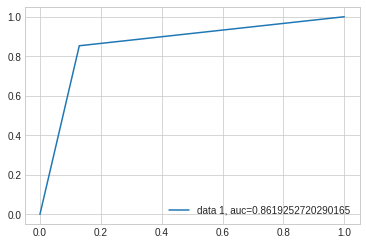

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


# with delete inprogeress


In [216]:
df = pd.read_excel('/content/drive/MyDrive/data_sets/DM-Classification/final.xlsx')

df = df[df['Close_Value']<15000]
df['Close_Value'] = df['Close_Value'].fillna(value=df['Close_Value'].mean())
df['Duration'] = (df['Close Date'] - df['Created Date']).dt.days
df = df.drop(columns=['Call', 'Email', 'Meeting', 'Posetive', 'Negative', 'Sentiment'])
df = df[df['Stage']!='In Progress']

In [217]:
df

,Unnamed: 0,Unnamed: 0.1,Customer,Agent,SalesAgentEmailID,ContactEmailID,Stage,Product,Close_Value,Created Date,Close Date,Duration
0,0,0,Konex,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255.0,2016-01-04,2016-05-24,141
1,1,1,Finjob,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45.0,2016-01-04,2016-11-02,303
4,4,4,Stanredtax,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180.0,2016-01-07,2016-01-31,24
5,5,5,Hatfan,Zane Levy,zane@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,517.0,2016-01-08,2016-12-08,335
7,7,7,Gogozoom,Darcel Schlecht,darcel@piedpiper.com,salina@gogozoom.com,Won,GTXPro,4359.0,2016-01-10,2016-01-28,18
...,...,...,...,...,...,...,...,...,...,...,...,...
7293,7293,7293,Treequote,Darcel Schlecht,darcel@piedpiper.com,benny@treequote.com,Won,GTXPro,5085.0,2017-12-31,2018-01-16,16
7294,7294,7294,Ganjaflex,Reed Clapper,reed@piedpiper.com,somer@ganjaflex.com,Won,GTX Basic,555.0,2017-12-31,2018-08-29,241
7297,7297,7297,Inity,Darcel Schlecht,darcel@piedpiper.com,palmira@inity.com,Lost,GTX Plus Pro,5169.0,2017-12-31,2018-07-10,191
7298,7298,7298,Inity,Darcel Schlecht,darcel@piedpiper.com,palmira@inity.com,Won,GTX Plus Pro,4880.0,2017-12-31,2018-02-06,37


In [218]:
features_df = pd.get_dummies(df, columns=['SalesAgentEmailID', 'ContactEmailID', 'Product'],drop_first=True)
features_df = features_df[[c for c in features_df if c not in ['Close_Value','Stage']] + ['Close_Value', 'Stage']]

In [219]:
X = features_df.iloc[:, 6:-1]
y = features_df.iloc[:, [-1]].values

In [220]:
from sklearn.preprocessing import LabelEncoder
labale_encoder_Y = LabelEncoder()
y[:,0] = labale_encoder_Y.fit_transform(y[:,0])
y = y.astype(np.int32)
# df_lw['Label'] = y
y,X

(array([[1],
        [1],
        [1],
        ...,
        [0],
        [1],
        [1]], dtype=int32),       Duration  ...  Close_Value
 0          141  ...       1255.0
 1          303  ...         45.0
 4           24  ...       3180.0
 5          335  ...        517.0
 7           18  ...       4359.0
 ...        ...  ...          ...
 7293        16  ...       5085.0
 7294       241  ...        555.0
 7297       191  ...       5169.0
 7298        37  ...       4880.0
 7299       703  ...         54.0
 
 [4780 rows x 121 columns])

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.fit_transform(X_test)

In [222]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [223]:
y_pred = classifier.predict(X_test)

In [224]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

(array([[304,  12],
        [ 27, 613]]), 0.9592050209205021, 0.9691699604743081)

# last_df

In [225]:
df = pd.read_excel('/content/drive/MyDrive/data_sets/DM-Classification/df_final.xlsx')


In [226]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.1.1', 'Customer', 'Agent', 'Created Date', 'Close Date', 'Stage'])

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Customer,Agent,Created Date,Close Date,Duration,SalesAgentEmailID_boris@piedpiper.com,SalesAgentEmailID_cassey@piedpiper.com,SalesAgentEmailID_cecily@piedpiper.com,SalesAgentEmailID_corliss@piedpiper.com,SalesAgentEmailID_daniell@piedpiper.com,SalesAgentEmailID_darcel@piedpiper.com,SalesAgentEmailID_donn@piedpiper.com,SalesAgentEmailID_elease@piedpiper.com,SalesAgentEmailID_garret@piedpiper.com,SalesAgentEmailID_gladys@piedpiper.com,SalesAgentEmailID_hayden@piedpiper.com,SalesAgentEmailID_james@piedpiper.com,SalesAgentEmailID_jonathan@piedpiper.com,SalesAgentEmailID_kami@piedpiper.com,SalesAgentEmailID_kary@piedpiper.com,SalesAgentEmailID_lajuana@piedpiper.com,SalesAgentEmailID_markita@piedpiper.com,SalesAgentEmailID_marty@piedpiper.com,SalesAgentEmailID_maureen@piedpiper.com,SalesAgentEmailID_moses@piedpiper.com,SalesAgentEmailID_niesha@piedpiper.com,SalesAgentEmailID_reed@piedpiper.com,SalesAgentEmailID_rosalina@piedpiper.com,SalesAgentEmailID_rosie@piedpiper.com,SalesAgentEmailID_versie@piedpiper.com,SalesAgentEmailID_vicki@piedpiper.com,SalesAgentEmailID_violet@piedpiper.com,SalesAgentEmailID_wilburn@piedpiper.com,SalesAgentEmailID_zane@piedpiper.com,ContactEmailID_antionette@bluthcompany.com,ContactEmailID_ashlie@sonron.com,ContactEmailID_belinda@finjob.com,...,ContactEmailID_monte@kinnamplus.com,ContactEmailID_natisha@groovestreet.com,ContactEmailID_nedra@ontomedia.com,ContactEmailID_nelia@dalttechnology.com,ContactEmailID_orpha@umbrellacorporation.com,ContactEmailID_palmira@inity.com,ContactEmailID_paola@opentech.com,ContactEmailID_pedro@newex.com,ContactEmailID_riley@blackzim.com,ContactEmailID_robbie@cheers.com,ContactEmailID_rosalyn@zencorporation.com,ContactEmailID_rosanne@y-corporation.com,ContactEmailID_salina@gogozoom.com,ContactEmailID_shella@zotware.com,ContactEmailID_shemeka@xx-holding.com,ContactEmailID_sherman@toughzap.com,ContactEmailID_somer@ganjaflex.com,ContactEmailID_tambra@singletechno.com,ContactEmailID_tanja@domzoom.com,ContactEmailID_terry@plussunin.com,ContactEmailID_titus@plexzap.com,ContactEmailID_tyron@hatfan.com,ContactEmailID_ursula@sumace.com,ContactEmailID_vanessa@xx-zobam.com,ContactEmailID_vella@yearin.com,ContactEmailID_verna@statholdings.com,ContactEmailID_williemae@zathunicon.com,ContactEmailID_winston@j-texon.com,ContactEmailID_ying@funholding.com,ContactEmailID_yolando@globexcorporation.com,ContactEmailID_zulema@silis.com,Product_GTX Basic,Product_GTX Plus Basic,Product_GTX Plus Pro,Product_GTXPro,Product_MG Advanced,Product_MG Special,Close_Value,Stage,Label
0,0,0,0,Konex,Corliss Cosme,2016-01-04,2016-05-24,141,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1255,Won,1
1,1,1,1,Finjob,Rosalina Dieter,2016-01-04,2016-11-02,303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,45,Won,1
2,4,4,4,Stanredtax,Lajuana Vencill,2016-01-07,2016-01-31,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3180,Won,1
3,5,5,5,Hatfan,Zane Levy,2016-01-08,2016-12-08,335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,517,Won,1
4,7,7,7,Gogozoom,Darcel Schlecht,2016-01-10,2016-01-28,18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4359,Won,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6573,7795,7795,7795,Vehement Capital Partne